In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.dates as dates
import calmap
%matplotlib inline

# Part I plots

## Daily crime counts

In [2]:
crime = pd.read_csv("data/dailycrime.csv", parse_dates=[0], infer_datetime_format=True, names=['date', 'crime_count'])
crime = crime[crime.date.dt.year<2016]

crime.set_index('date', inplace=True)

//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


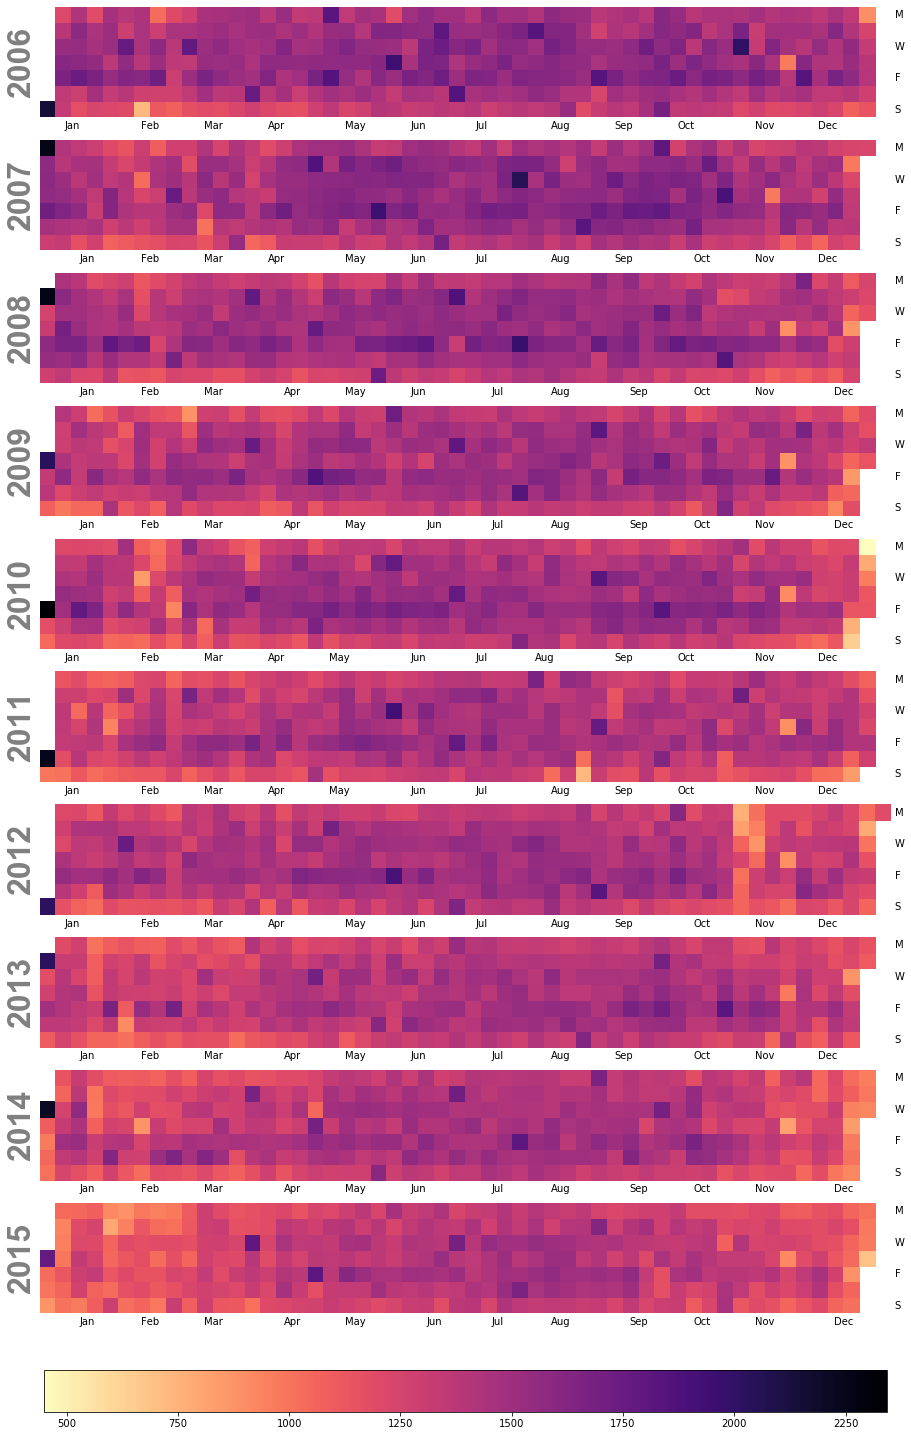

In [3]:
fig,ax=  calmap.calendarplot(crime['crime_count'], daylabels='MTWTFSS', dayticks=[0, 2, 4, 6]\
                   , fig_kws = {'figsize': (16, 20)}, cmap = 'magma_r', linewidth=0, fillcolor='grey')
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), orientation='horizontal',fraction=0.03, pad=0.04)

## Average delay in days between occurrence date and report date

In [4]:
delay = pd.read_csv("data/delay.csv")
delay = delay.sort_values(by='Average days', ascending=False)

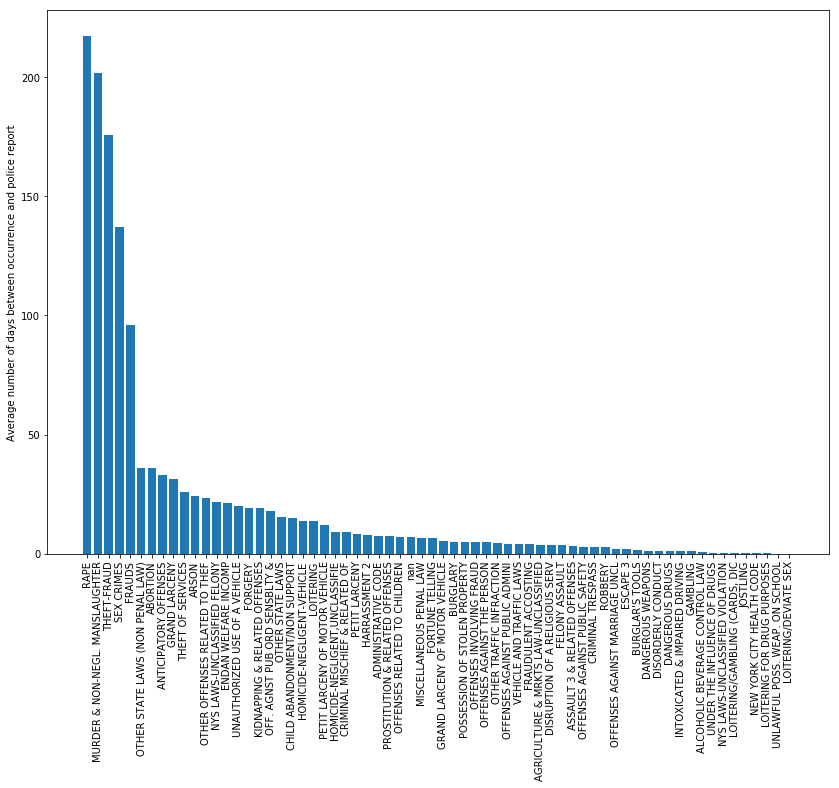

In [5]:
fig = plt.figure(figsize=(14, 10))

num_features = len(delay)

y_pos = np.arange(num_features)

plt.bar(y_pos, delay['Average days'])
plt.xticks(y_pos, delay['Offense'],rotation='vertical')
plt.ylabel('Average number of days between occurrence and police report')

## Delay distribution between occurrence date and report date in days for rape

In [6]:
rape = pd.read_csv("data/rape.csv", header=None)

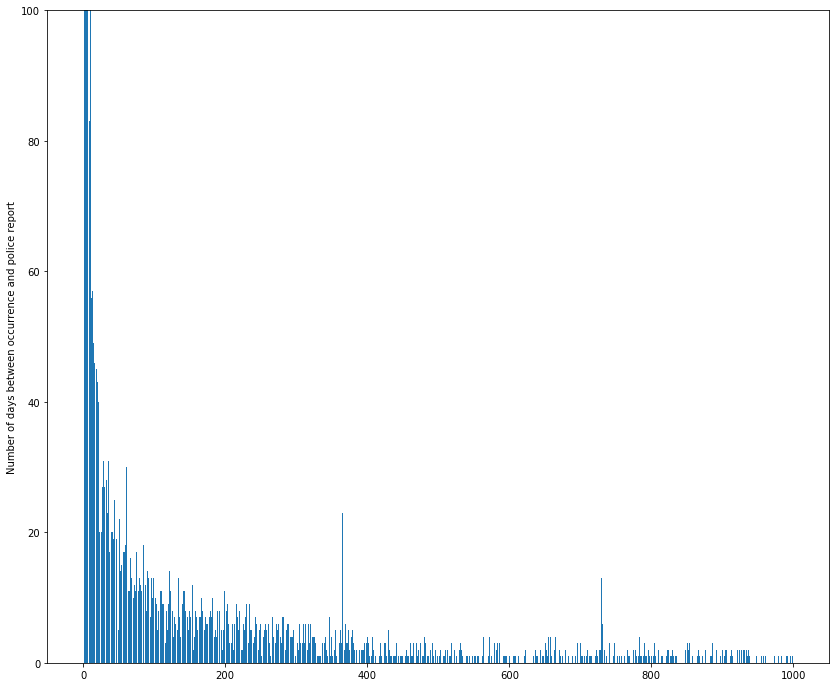

In [7]:
fig = plt.figure(figsize=(14, 12))

plt.bar(list(rape[rape[1] < 1000][1]), list(rape[rape[1] < 1000][2]))
plt.ylim(0,100)
plt.ylabel('Number of days between occurrence and police report')

## Distribution of crimes that are reported between 720 and 740 days later

In [8]:
twoyears = pd.read_csv("data/730.csv")

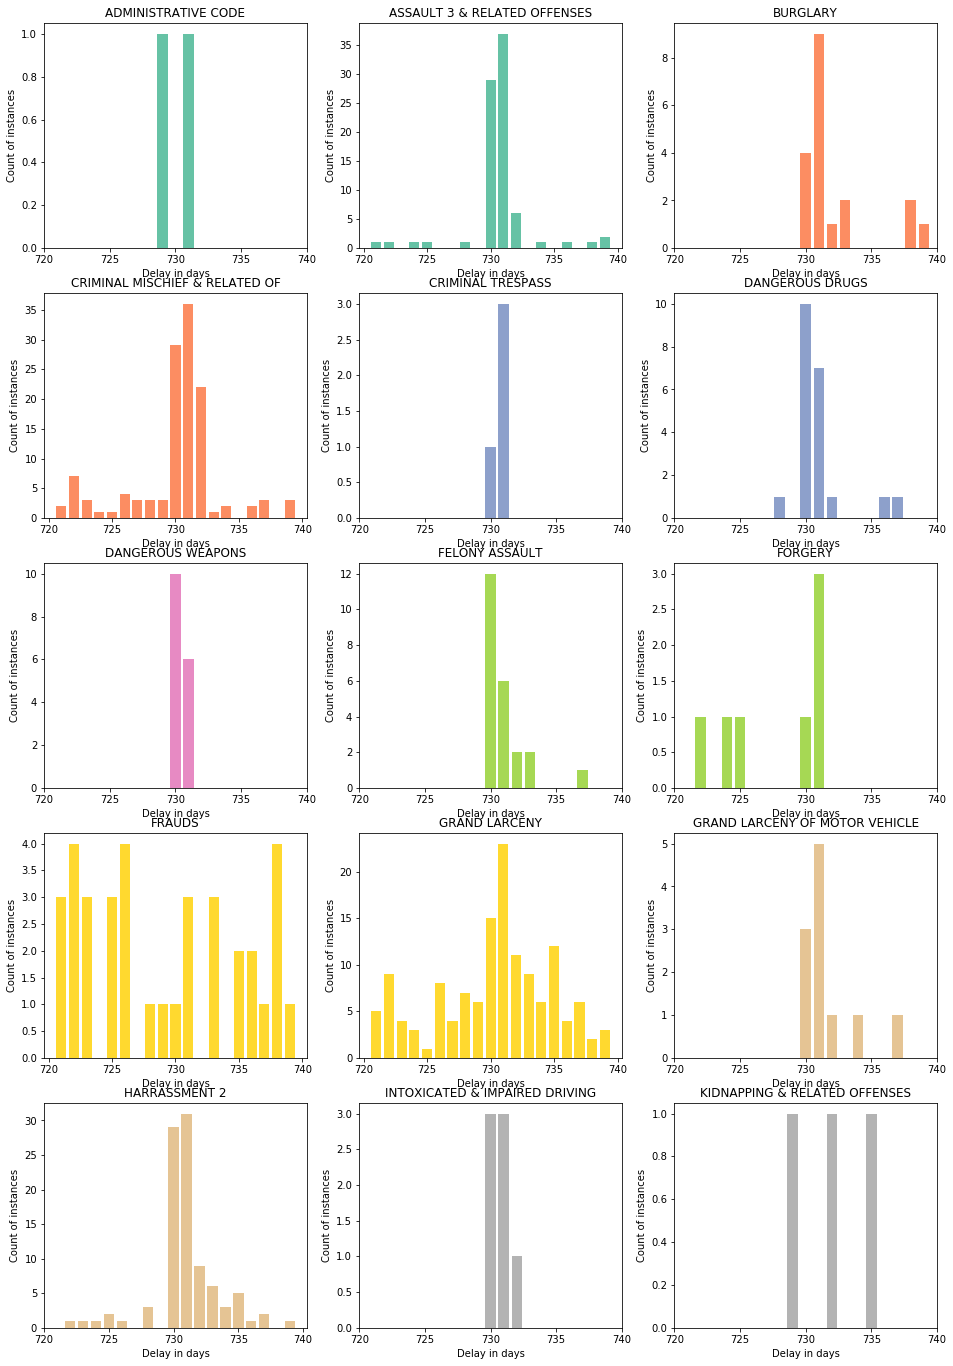

In [9]:
plt.figure(figsize=(16,24))

cmap = plt.get_cmap('Set2')
colors = [cmap(i) for i in np.linspace(0, 1, 15)]

gs = gridspec.GridSpec(5, 3)

i = 0
for crime in twoyears['Crime'].unique()[:15]:
    plt.subplot(gs[i])
    plt.bar(list(twoyears[twoyears['Crime'] == crime]['Delay']), list(twoyears[twoyears['Crime'] == crime]['Count']),\
           color = colors[i])
    plt.xticks([720, 725, 730, 735, 740])
    plt.xlabel('Delay in days')
    plt.ylabel('Count of instances')
    plt.title('%s' % (crime))
    
    i += 1
    

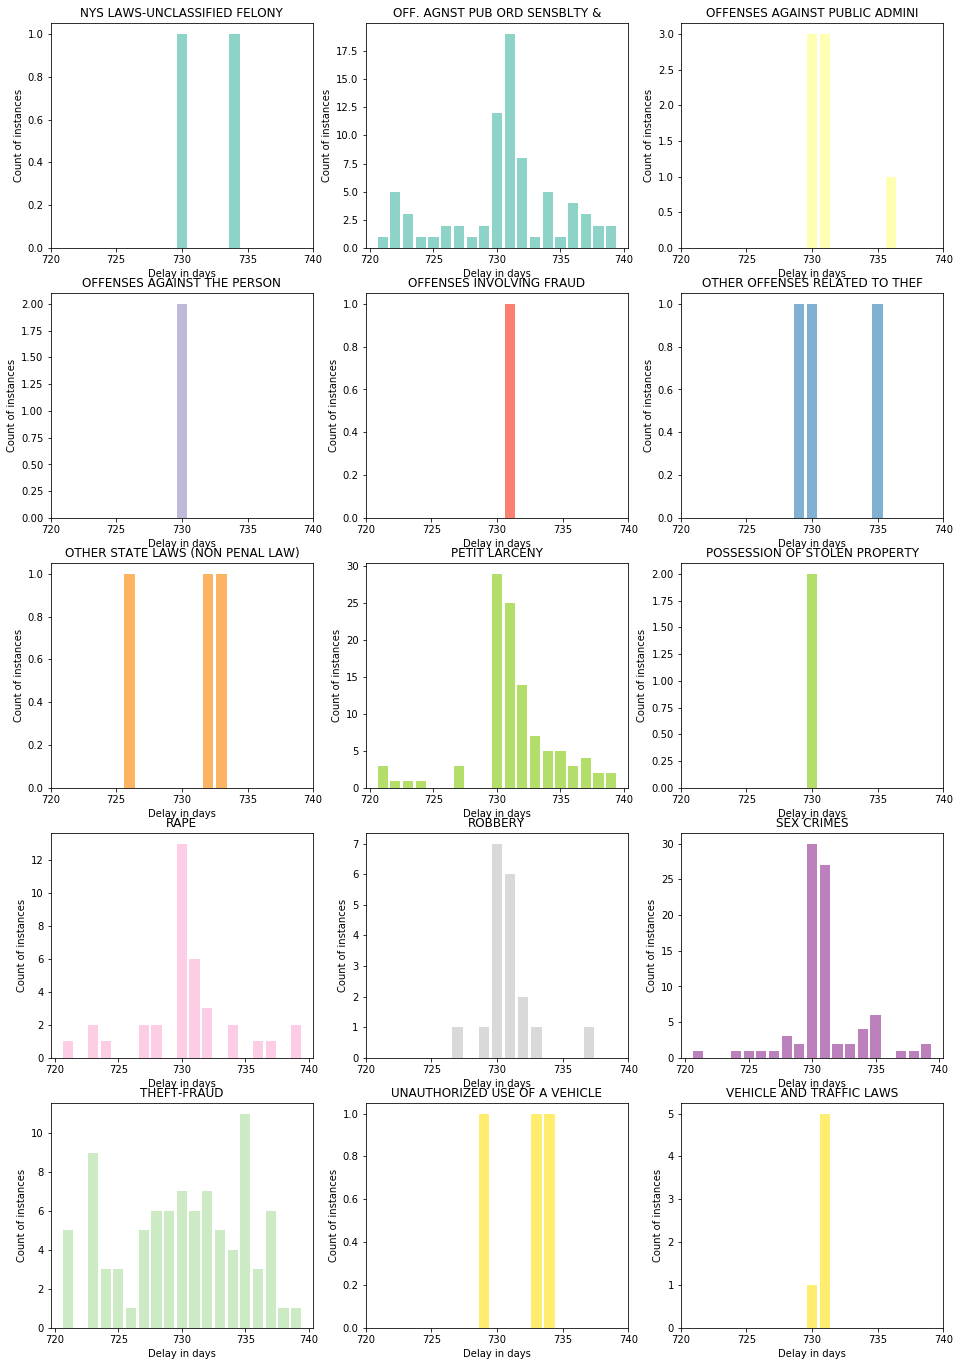

In [10]:
plt.figure(figsize=(16,24))

gs = gridspec.GridSpec(5, 3)

cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, 15)]

i = 0
for crime in twoyears['Crime'].unique()[16:]:
    plt.subplot(gs[i])
    
    plt.plot()
    plt.bar(list(twoyears[twoyears['Crime'] == crime]['Delay']), list(twoyears[twoyears['Crime'] == crime]['Count']),\
           color = colors[i])
    plt.xticks([720, 725, 730, 735, 740])
    plt.xlabel('Delay in days')
    plt.ylabel('Count of instances')
    plt.title('%s' % (crime))
    
    i += 1
    

## Borough distribution of felony/misdemeanor/violations

In [11]:
borough = pd.read_csv("data/borough_level.csv")

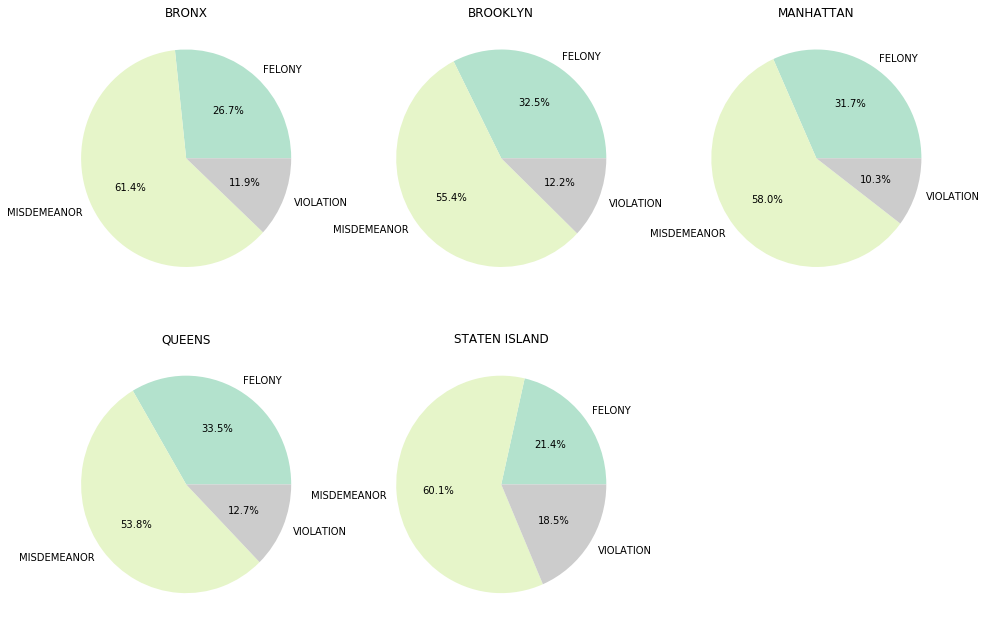

In [12]:
cmap = plt.get_cmap('Pastel2')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]

plt.figure(figsize=(16,11))

gs = gridspec.GridSpec(2, 3)

i = 0
for bor in borough['Borough'].unique():
    plt.subplot(gs[i])
    plt.pie(borough[borough['Borough'] == bor]['Counts'],\
             labels = borough[borough['Borough'] == bor]['Level'], autopct='%1.1f%%', colors=colors)
    plt.title('%s' % (bor))
    
    
    i += 1
    

# Part II plots

## Crime vs Rolling Average Temperature

In [13]:
crime = pd.read_csv("data/dailycrime.csv", parse_dates=[0], infer_datetime_format=True, names=['date', 'crime_count'])
crime = crime[crime.date.dt.year<2016]

In [14]:
crime['crime_rolling'] =  crime['crime_count'].rolling(14).mean()

In [15]:
temp = pd.read_csv("data/avgtemp.csv", parse_dates=[0], infer_datetime_format=True, names=['date', 'avg_temp'])

In [16]:
temp_join = crime.merge(temp, on=['date'], how='left')

temp_join['avg_temp_rolling'] = temp_join.avg_temp.rolling(14).mean()

temp_join['avg_temp_rolling_corr'] = temp_join['avg_temp_rolling']\
                                    - temp_join['avg_temp_rolling']*0.04*(temp_join.date.dt.year-2006)

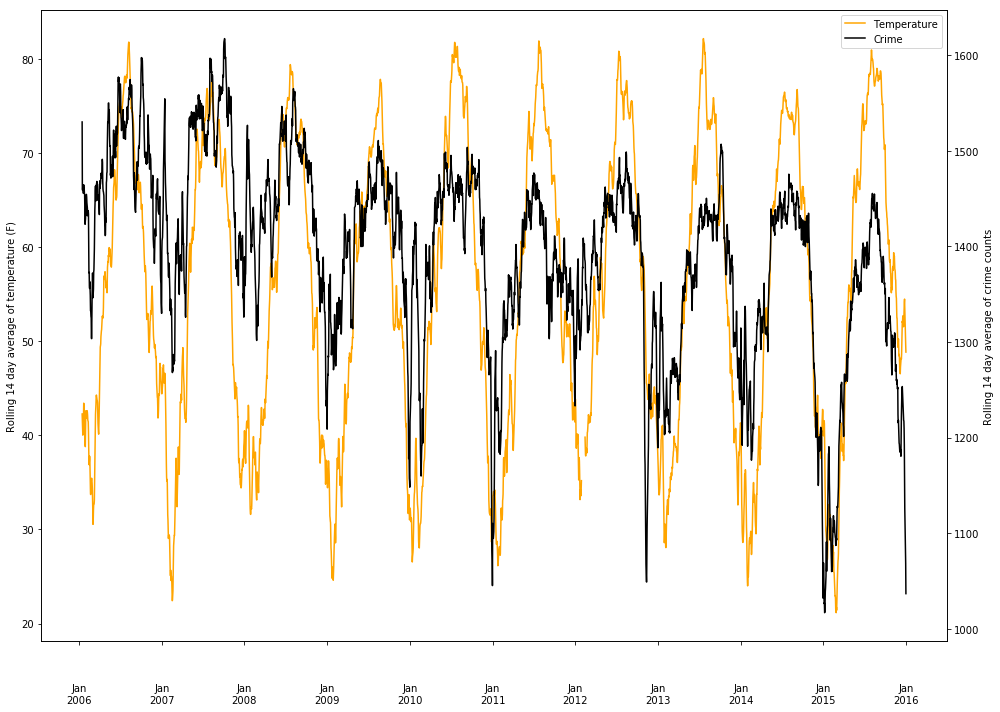

In [17]:
fig, ax1 = plt.subplots(figsize=(14,10))

ax2 = ax1.twinx()


ax1.plot_date(temp_join['date'].dt.to_pydatetime(), temp_join['avg_temp_rolling'], '-',
              label='Temperature', color = 'orange')
ax2.plot_date(temp_join['date'].dt.to_pydatetime(), temp_join['crime_rolling'], '-', label='Crime',\
              color='black')

ax1.xaxis.set_major_locator(dates.YearLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.set_ylabel("Rolling 14 day average of temperature (F)")
ax2.set_ylabel("Rolling 14 day average of crime counts")

lines = ax1.get_lines() + ax2.get_lines()
plt.legend(lines, [l.get_label() for l in lines], loc='best')
plt.tight_layout()


## Crime vs Rolling Average Temperature + Year correction

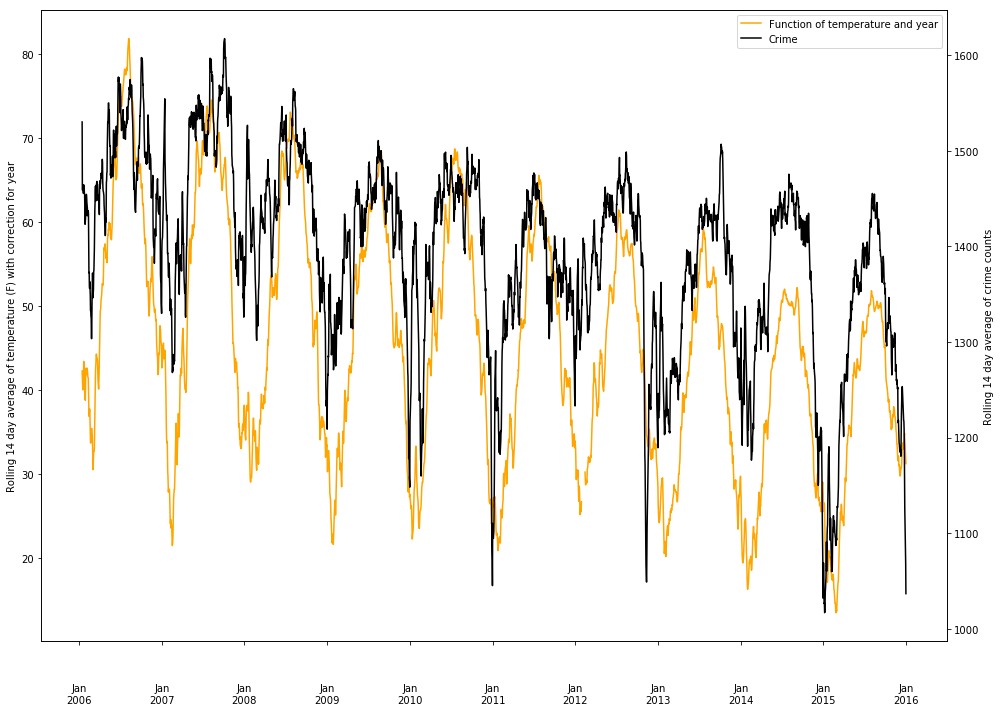

In [18]:
fig, ax1 = plt.subplots(figsize=(14,10))

ax2 = ax1.twinx()


ax1.plot_date(temp_join['date'].dt.to_pydatetime(), temp_join['avg_temp_rolling_corr'], '-',
              label='Function of temperature and year', color = 'orange')
ax2.plot_date(temp_join['date'].dt.to_pydatetime(), temp_join['crime_rolling'], '-', label='Crime',\
              color='black')

ax1.xaxis.set_major_locator(dates.YearLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.set_ylabel("Rolling 14 day average of temperature (F) with correction for year")
ax2.set_ylabel("Rolling 14 day average of crime counts")

lines = ax1.get_lines() + ax2.get_lines()
plt.legend(lines, [l.get_label() for l in lines], loc='best')
plt.tight_layout()

In [19]:
temp_join.loc[:, ['crime_rolling', 'avg_temp_rolling', 'avg_temp_rolling_corr']].corr()

,crime_rolling,avg_temp_rolling,avg_temp_rolling_corr
crime_rolling,1.000000,0.686146,0.839443
avg_temp_rolling,0.686146,1.000000,0.886355
avg_temp_rolling_corr,0.839443,0.886355,1.000000


## Crime vs Snow

In [20]:
snow = pd.read_csv("data/snow.csv", parse_dates=[0], infer_datetime_format=True, header=None, names=['date', 'snow'])

In [21]:
snow_join = crime.merge(snow, on=['date'], how='left')

In [22]:
snow_join.loc[:, ['crime_count', 'snow']].corr()

,crime_count,snow
crime_count,1.000000,-0.247516
snow,-0.247516,1.000000


In [23]:
snow_join.set_index('date', inplace=True)

//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


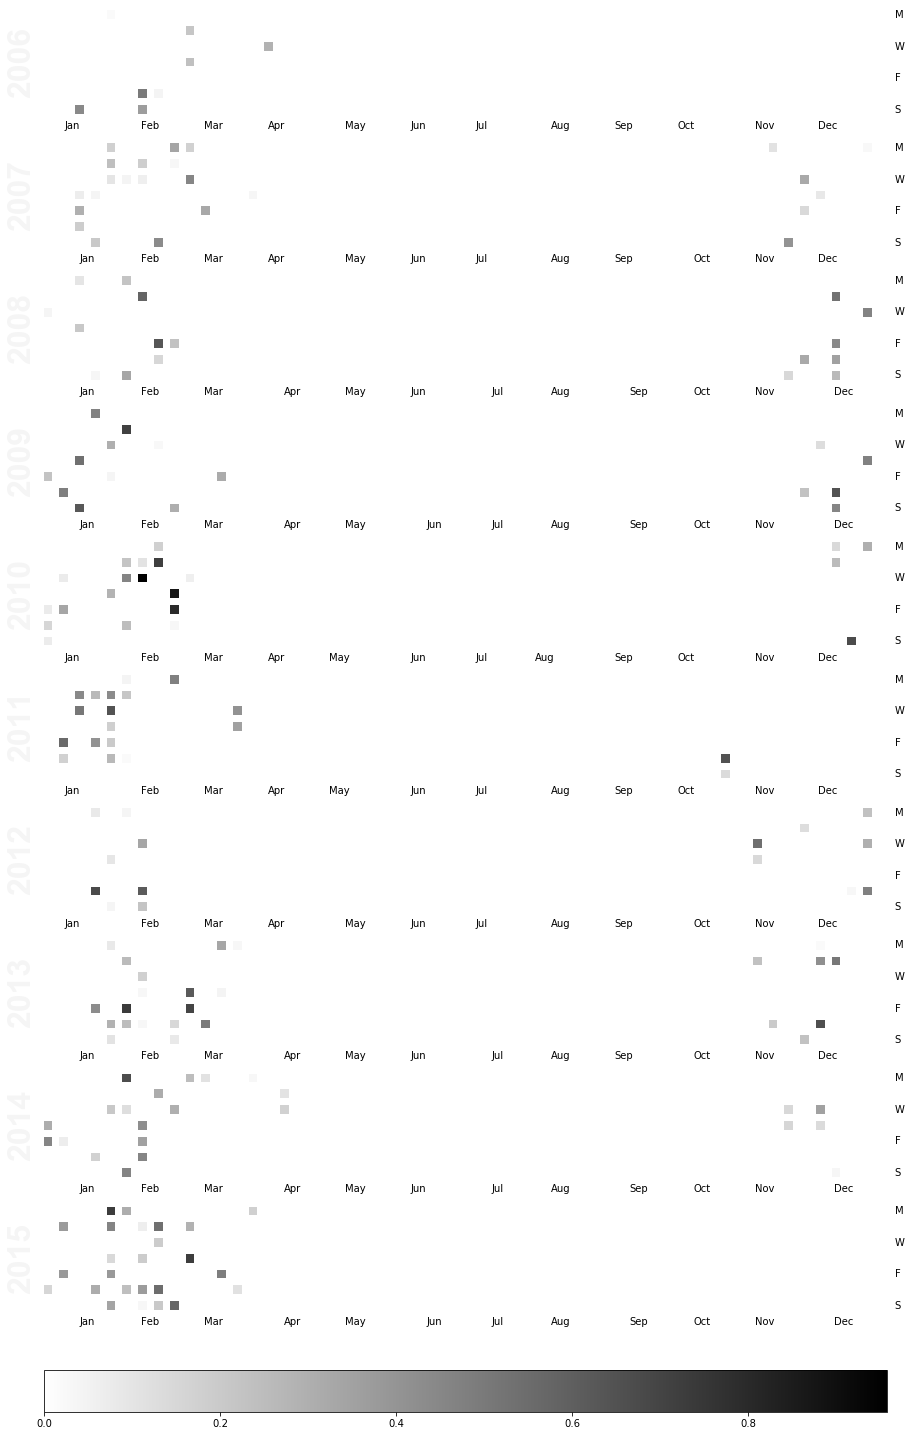

In [24]:
fig, ax = calmap.calendarplot(snow_join['snow'], daylabels='MTWTFSS', dayticks=[0, 2, 4, 6]\
                   , fig_kws = {'figsize': (16, 20)}, linewidth=6, cmap = 'gray_r')
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), orientation='horizontal',fraction=0.03, pad=0.04)

## Crime vs Rain

In [25]:
rain = pd.read_csv("data/rain.csv", parse_dates=[0], infer_datetime_format=True, header=None, names=['date', 'rain'])

In [26]:
rain_join = crime.merge(rain, on=['date'], how='left')

In [27]:
rain_join.loc[:, ['crime_count', 'rain']].corr()

,crime_count,rain
crime_count,1.000000,-0.113636
rain,-0.113636,1.000000


In [28]:
rain_join.set_index('date', inplace=True)

//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:294: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  by_day = data.resample('D', how=how)
//anaconda/envs/py35/lib/python3.5/site-packages/calmap/__init__.py:146: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  linecolor = ax.get_axis_bgcolor()


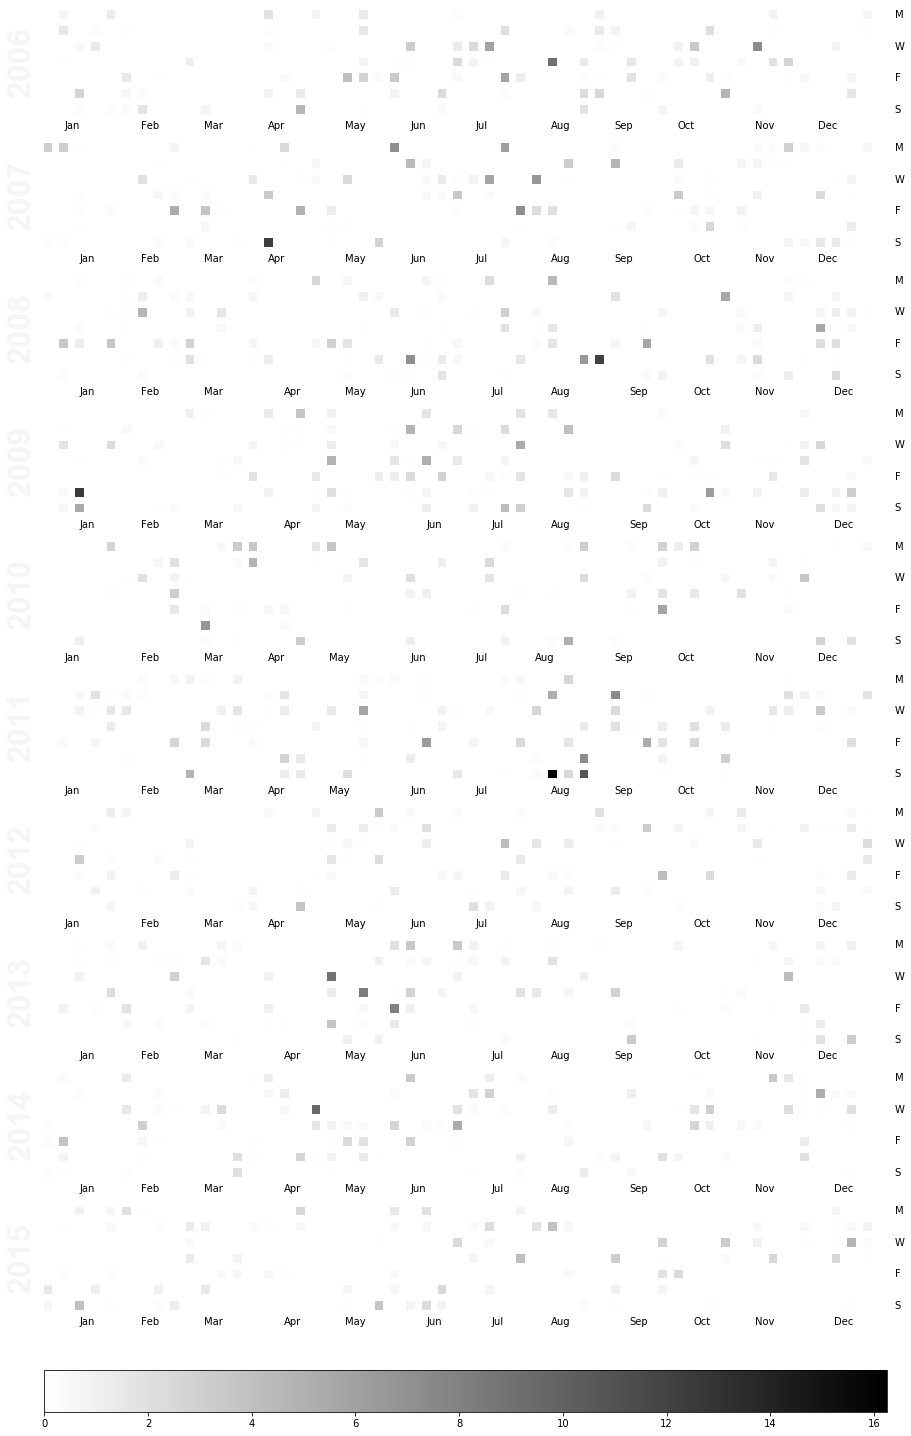

In [29]:
fig, ax = calmap.calendarplot(rain_join['rain'], daylabels='MTWTFSS', dayticks=[0, 2, 4, 6]\
                   , fig_kws = {'figsize': (16, 20)}, linewidth=6, cmap = 'gray_r')
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), orientation='horizontal',fraction=0.03, pad=0.04)

## Crimes per capita vs Population Density

In [30]:
pop = pd.read_csv("data/borough_pop.csv")

In [31]:
pop.corr()

,counts,sq_mi,population,crimes per capita,pop / mi^2,norm crimes per capita,norm pop/mi^2
counts,1.000000,-0.055343,0.864756,0.410243,0.644056,0.410243,0.644056
sq_mi,-0.055343,1.000000,0.438148,-0.861640,-0.639481,-0.861640,-0.639481
population,0.864756,0.438148,1.000000,-0.090902,0.310355,-0.090902,0.310355
crimes per capita,0.410243,-0.861640,-0.090902,1.000000,0.708895,1.000000,0.708895
pop / mi^2,0.644056,-0.639481,0.310355,0.708895,1.000000,0.708895,1.000000
norm crimes per capita,0.410243,-0.861640,-0.090902,1.000000,0.708895,1.000000,0.708895
norm pop/mi^2,0.644056,-0.639481,0.310355,0.708895,1.000000,0.708895,1.000000


In [32]:
pop.loc[:, ['crimes per capita', 'pop / mi^2']].corr()

,crimes per capita,pop / mi^2
crimes per capita,1.000000,0.708895
pop / mi^2,0.708895,1.000000


## Sentence Length vs Crime Counts

In [33]:
sentence = pd.read_csv("data/sentence_length.csv")

In [34]:
sentence.corr()

,Maximum sentence length,Counts
Maximum sentence length,1.000000,-0.469974
Counts,-0.469974,1.000000
